In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import zscore

### Question 1 and 2 

In [2]:
#a.
data = pd.read_csv("msft.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/30/2016,62.959999,62.990002,62.029999,62.139999,25465900,62.139999
1,12/29/2016,62.860001,63.200001,62.730000,62.900002,10181600,62.900002
2,12/28/2016,63.400002,63.400002,62.830002,62.990002,14247400,62.990002
3,12/27/2016,63.209999,64.070000,63.209999,63.279999,11583900,63.279999
4,12/23/2016,63.450001,63.540001,62.799999,63.240002,12398000,63.240002


In [3]:
#b.
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000
mean,33.980318,34.312530,33.654591,33.993987,5.296776e+07,30.456126
std,10.536277,10.589226,10.491077,10.549777,2.908349e+07,11.711547
min,15.200000,15.620000,14.870000,15.150000,8.370500e+06,12.381153
25%,26.760000,27.000000,26.480000,26.770000,3.370250e+07,22.349302
50%,29.969999,30.219999,29.730000,29.980000,4.754195e+07,25.306451
75%,41.369999,41.682499,41.040001,41.475000,6.389458e+07,39.035395
max,63.840000,64.099998,63.410000,63.619999,3.193179e+08,63.619999


In [4]:
#c.
closing = data['Close']
closing.head(5)

0    62.139999
1    62.900002
2    62.990002
3    63.279999
4    63.240002
Name: Close, dtype: float64

In [5]:
#d.
cdate = data['Date'].values
cdate = cdate[1:]
N = closing.size
change = closing[:N-1].values - closing [1:].values
changedata = pd.Series(change, index = cdate)
changedata.head(5)

12/29/2016   -0.760003
12/28/2016   -0.090000
12/27/2016   -0.289997
12/23/2016    0.039997
12/22/2016   -0.309997
dtype: float64

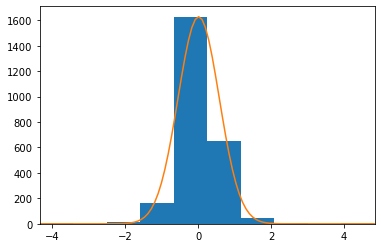

In [6]:
#e.
plt.figure(1)
result = plt.hist(changedata)
plt.xlim((min(changedata), max(changedata)))

mean = np.mean(changedata)
variance = np.var(changedata)
sigma = np.sqrt(variance)
x = np.linspace(min(changedata), max(changedata), 100)
dx = result[1][1] - result[1][0]
scale = len(changedata)*dx
plt.plot(x, norm.pdf(x, mean, sigma)*scale)
plt.show()

The graph looks like a gaussian bell curve. 

In [7]:
data1 = data[1:]

In [8]:
#f.
zscores = zscore(changedata)
changedata[zscores > 4]

10/20/2016    2.410000
7/19/2016     2.820000
1/28/2016     3.029999
10/22/2015    4.840000
4/23/2015     4.529999
8/22/2013     2.360001
10/10/2008    4.000000
10/25/2007    3.039999
dtype: float64

In [9]:
#g.
changedata[zscores < - 4]

4/21/2016   -4.000000
8/20/2015   -2.590000
1/26/2015   -4.349998
7/18/2013   -4.039999
1/21/2009   -2.269998
9/26/2008   -2.390000
dtype: float64

### Question 3

In [10]:
#a.
bins = pd.cut(changedata, 5)
bins.head(5)

12/29/2016    (-2.512, -0.674]
12/28/2016     (-0.674, 1.164]
12/27/2016     (-0.674, 1.164]
12/23/2016     (-0.674, 1.164]
12/22/2016     (-0.674, 1.164]
dtype: category
Categories (5, interval[float64]): [(-4.359, -2.512] < (-2.512, -0.674] < (-0.674, 1.164] < (1.164, 3.002] < (3.002, 4.84]]

In [11]:
#b. 
bins = pd.qcut(changedata, [0,0.2,0.4,0.6,0.8,1])
bins.head(5)

12/29/2016    (-4.351, -0.33]
12/28/2016       (-0.09, 0.1]
12/27/2016     (-0.33, -0.09]
12/23/2016       (-0.09, 0.1]
12/22/2016     (-0.33, -0.09]
dtype: category
Categories (5, interval[float64]): [(-4.351, -0.33] < (-0.33, -0.09] < (-0.09, 0.1] < (0.1, 0.36] < (0.36, 4.84]]

<center> Thank You! <center>